In [22]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
df = pd.read_csv('churn_clean.csv')

In [24]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


A)
    1. Which features and variable are best to help determine which customer is at high risk of churning?
    2. stakeholders will benefit from this narrowing the variability of which customer possibly churning 
    3. churn column, monthly charge, tenure, 8 survey questions( timely response, timely fixes, timely replacements, reliability, options, respectful response, courteous exchange, evidence of active listening)


In [25]:
# B1) 

contingency= pd.crosstab(df['Churn'], df['Item1'])
contingency

Item1,1,2,3,4,5,6,7
Churn,,,,,,,
No,158,1002,2562,2473,994,146,15
Yes,66,391,886,885,365,53,4


In [26]:
contingency_pct= pd.crosstab(df['Churn'],df['Item1'], normalize='index')
contingency_pct

Item1,1,2,3,4,5,6,7
Churn,,,,,,,
No,0.021497,0.136327,0.348571,0.336463,0.135238,0.019864,0.002041
Yes,0.024906,0.147547,0.334340,0.333962,0.137736,0.020000,0.001509


<AxesSubplot:xlabel='Item1', ylabel='Churn'>

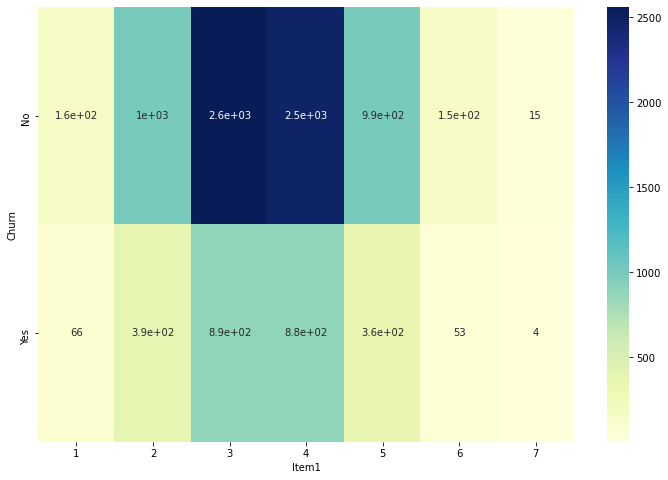

In [27]:
plt.figure(figsize=(12,8))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")

In [28]:
# B2)
c,p, dof, expected = chi2_contingency(contingency)
print(p)

0.6318335816054494


In [29]:
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
        print('Dependent (reject H0)')
else:
        print('Independent (H0 holds true)')

p value is 0.6318335816054494
Independent (H0 holds true)


 B3)
 Chi-square was chosen for the analysis of determining which customers are likely to churn using categorical variables. The 'Churn' column which is binomial and 'Item1' for timely responses were used to test for independence. 
 


C)
Continuous variables:
    -MonthlyCharge
    -Outage_sec_perweek
Categorical Variables:
    -Item1
    -Item3

In [30]:
# C1)
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082813,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141369,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [31]:
import matplotlib.pyplot as plt

(array([ 224., 1393.,    0., 3448.,    0., 3358., 1359.,    0.,  199.,
          19.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

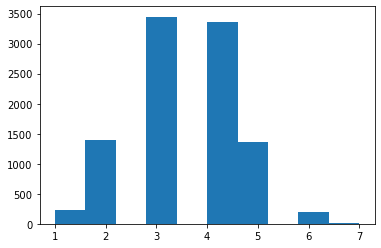

In [32]:
plt.hist(df['Item1'])

(array([2.020e+02, 1.424e+03, 3.435e+03, 0.000e+00, 3.410e+03, 1.313e+03,
        0.000e+00, 2.030e+02, 1.200e+01, 1.000e+00]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

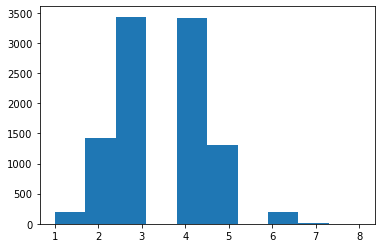

In [46]:
plt.hist(df['Item3'])

(array([ 230.,  853., 1695., 2034., 1842., 1089.,  926.,  791.,  388.,
         152.]),
 array([ 79.97886  , 100.9970159, 122.0151718, 143.0333277, 164.0514836,
        185.0696395, 206.0877954, 227.1059513, 248.1241072, 269.1422631,
        290.160419 ]),
 <BarContainer object of 10 artists>)

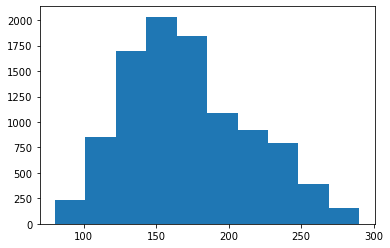

In [34]:
plt.hist(df['MonthlyCharge'])

(array([  42.,  245.,  876., 1919., 2804., 2357., 1240.,  413.,   94.,
          10.]),
 array([ 0.09974694,  2.21049525,  4.32124355,  6.43199186,  8.54274016,
        10.65348847, 12.76423678, 14.87498508, 16.98573339, 19.09648169,
        21.20723   ]),
 <BarContainer object of 10 artists>)

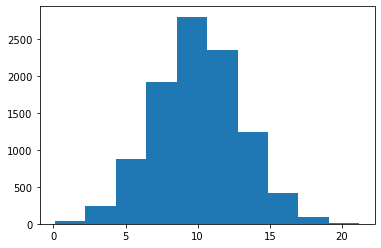

In [35]:
plt.hist(df['Outage_sec_perweek'])

D)
Continuous Variables:
    -Outage_sec_perweek
    -Bandwidth_GB_Year
Categorical Variable
    -Item1
    -Item3

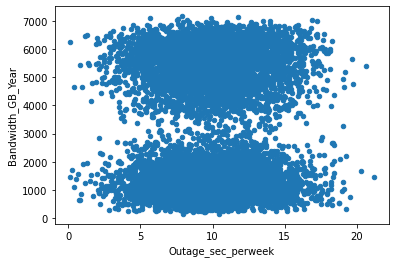

In [36]:
# D1)
df.plot(x='Outage_sec_perweek', y='Bandwidth_GB_Year', kind='scatter')
plt.show()

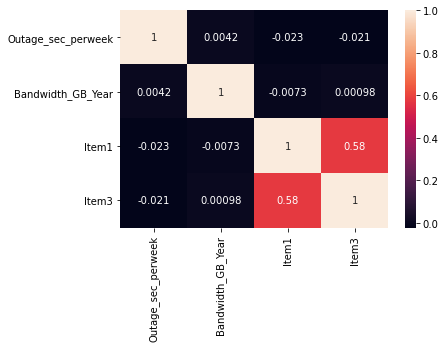

In [49]:
churn_bivariate = df[['Outage_sec_perweek', 'Bandwidth_GB_Year', 'Item1', 'Item3']]
sns.heatmap(churn_bivariate.corr(), annot=True)
plt.show()

<AxesSubplot:xlabel='Outage_sec_perweek', ylabel='Bandwidth_GB_Year'>

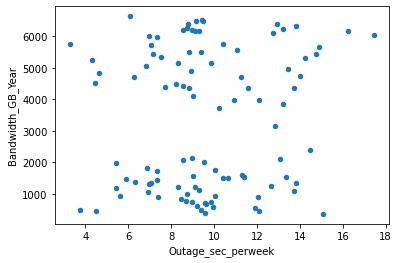

In [52]:
churn_bivariate[churn_bivariate['Outage_sec_perweek'] < 22].sample(100).plot.scatter(x='Outage_sec_perweek', 
                                                                                     y='Bandwidth_GB_Year')